In [1]:
import pandas as pd

# ARIMA 활용한 비트코인 가격 예측

In [2]:
sr = pd.read_csv('./market-price.csv', header=0, index_col='Timestamp', squeeze=True)
sr.head()

Timestamp
2021-03-30 00:00:00    57627.67
2021-03-31 00:00:00    58730.13
2021-04-01 00:00:00    58735.25
2021-04-02 00:00:00    58736.92
2021-04-03 00:00:00    59031.32
Name: market-price, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

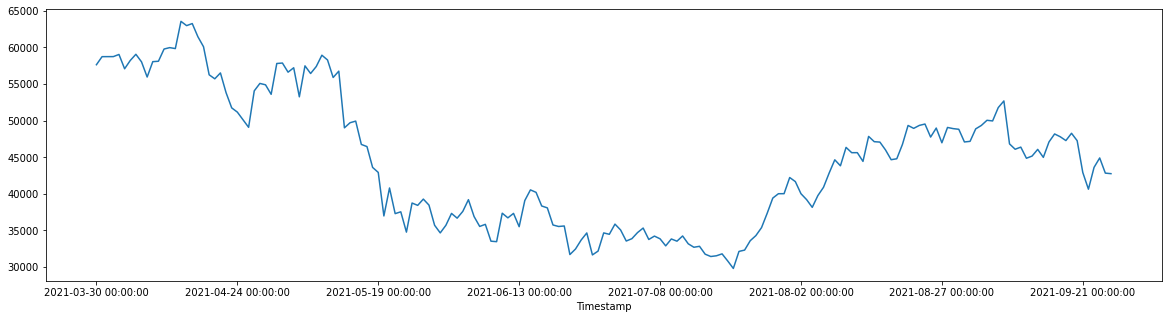

In [3]:
sr.plot(figsize=(20,5))

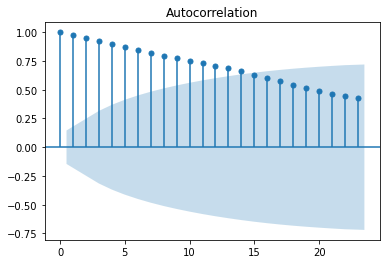

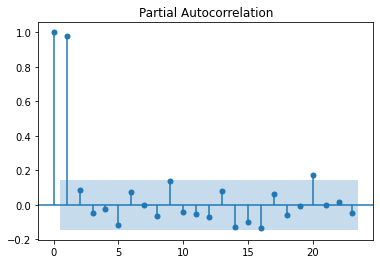

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sr)
plot_pacf(sr)   # Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 15.
plt.show()

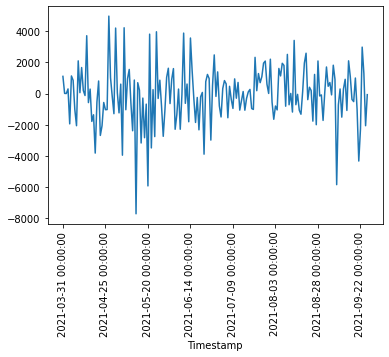

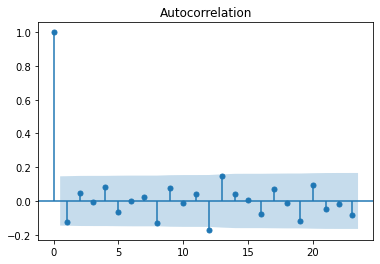

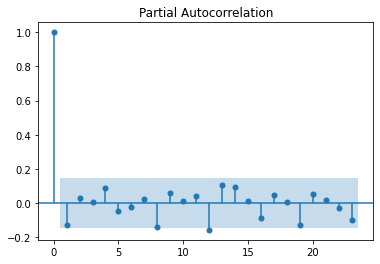

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1 = sr.diff(periods=1).iloc[1:]
diff_1.plot()
plt.xticks(rotation =90)
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

model = ARIMA(sr, order=(0,1,1))
arima_res = model.fit(trend='c', full_output=True, disp=1)
print(arima_res.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  180
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1610.413
Method:                       css-mle   S.D. of innovations           1858.939
Date:                Mon, 27 Sep 2021   AIC                           3226.826
Time:                        14:33:32   BIC                           3236.405
Sample:                    03-31-2021   HQIC                          3230.710
                         - 09-26-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -83.1940    122.425     -0.680      0.497    -323.143     156.755
ma.L1.D.market-price    -0.1171      0.070     -1.663      0.096      -0.255       0.021
            

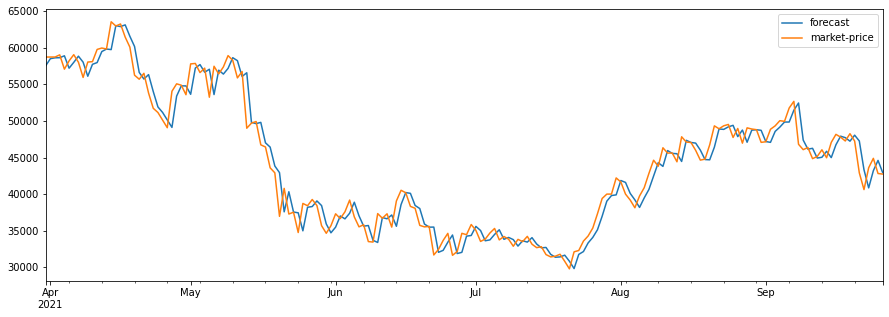

In [7]:
pig, ax = plt.subplots(figsize=(15,5))
arima_res.plot_predict(ax=ax)
plt.show()

In [8]:
import numpy as np
fore = arima_res.forecast(steps=1)
#  예측값, stderr,   upper bound~lower bound 
print(fore)
print(np.array(fore[0] )/1000)

(array([42682.25782029]), array([1858.93914958]), array([[39038.80403766, 46325.71160291]]))
[42.68225782]
